In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import keras

In [2]:
from keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [4]:
X_train.shape

(60000, 28, 28)

## Class Probabilities

In [5]:
y_count = np.zeros(10)
for label in y_train:
    y_count[label] += 1

print("y_counts: ", y_count, y_count.sum(), "\n")

# Probabilities per Label
label_probs = y_count/y_count.sum()*100
for i in range(10):
    print(f"Probability for Class {i}: {label_probs[i]:.2f} %")

y_counts:  [5923. 6742. 5958. 6131. 5842. 5421. 5918. 6265. 5851. 5949.] 60000.0 

Probability for Class 0: 9.87 %
Probability for Class 1: 11.24 %
Probability for Class 2: 9.93 %
Probability for Class 3: 10.22 %
Probability for Class 4: 9.74 %
Probability for Class 5: 9.04 %
Probability for Class 6: 9.86 %
Probability for Class 7: 10.44 %
Probability for Class 8: 9.75 %
Probability for Class 9: 9.92 %


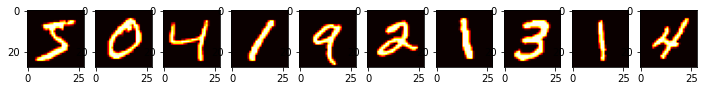

In [6]:
fig, ax = plt.subplots(1, 10, figsize=(12,12))
for i in range(10):
    ax[i].imshow(X_train[i], cmap="hot")
plt.show()

print(X_train)

In [7]:
X_train = X_train.reshape((60000, 784))

In [8]:
X_test = X_test.reshape((10000, 784))

In [9]:
X_test.shape

(10000, 784)

## Train

In [10]:
from sklearn import naive_bayes

In [11]:
methods = [naive_bayes.MultinomialNB, naive_bayes.GaussianNB, naive_bayes.BernoulliNB]

In [12]:
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV, KFold

for method in methods:
    print(str(method.__name__).upper(), "\n")
    nb = method()

    params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
    gs_NB = GridSearchCV(estimator=nb,
                 param_grid=params_NB,
                 cv=KFold,   # use any cross validation technique
                 verbose=1,
                 scoring='accuracy')

    nb.fit(X_train, y_train)
    pred = nb.predict(X_test)
    score = nb.score(X_test, y_test)
    print("Test accuracy: ", score, "\n")
    print(confusion_matrix(pred, y_test))

    print("\n\n")


In [13]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV


methods = [naive_bayes.GaussianNB]

for model in methods:
    print(str(model.__name__).upper(), "\n")
    nb = model()

    pipe = Pipeline(steps=[
                        ('pca', PCA()),
                        ('estimator', nb),
                        ])

    parameters = {'estimator__var_smoothing': [1e-2, 1e-1, 1, 2]}
    Bayes = GridSearchCV(pipe, parameters, scoring='accuracy', cv=10).fit(X_train, y_train)

    print(Bayes.best_estimator_)
    print('best score:')
    print(Bayes.best_score_)
    predictions = Bayes.best_estimator_.predict(X_test)

    pred = Bayes.predict(X_test)
    score = Bayes.score(X_test, y_test)
    print("Test accuracy: ", score, "\n")
    print(confusion_matrix(pred, y_test))

    print("\n\n")

GAUSSIANNB 

Pipeline(steps=[('pca', PCA()), ('estimator', GaussianNB(var_smoothing=0.1))])
best score:
0.7189666666666665
Test accuracy:  0.7402 

[[ 918    0   41    7    1   14   18    2   16   12]
 [   8 1130  289  143  125  151  102  181  208   78]
 [   0    0  433    0    0    0    0    2    1    0]
 [   1    3   59  751    0   78    1    0   54    6]
 [   0    0   34    2  652   14   14    9   10   12]
 [  10    0    2   11    0  507   22    0   15    0]
 [  15    1   29    4    7   22  794    0   12    0]
 [   3    1   33   20    1   35    0  789   16   11]
 [   1    0   34    5    0    4    0    0  538    0]
 [  24    0   78   67  196   67    7   45  104  890]]





# Improving Accuracy

In [14]:
import cv2

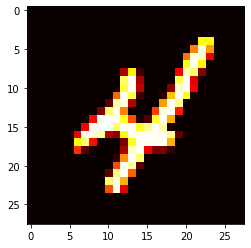

In [15]:
p = np.array(X_train[9], dtype="uint8")
p = p.reshape((28,28))
plt.imshow(p, cmap="hot")

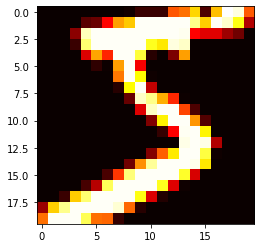

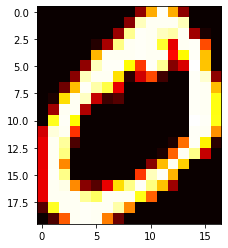

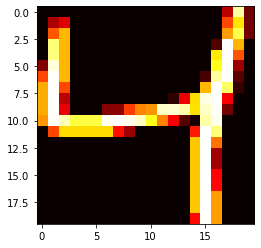

In [16]:
for i in range(3):
    p = np.array(X_train[i], dtype="uint8")
    p = p.reshape((28,28))
    x,y,w,h = cv2.boundingRect(p)
    img1 = p[y:(y+h), x:(x+w)]
    plt.imshow(img1, cmap='hot')
    plt.show()

In [53]:
def reduce_bl_pixels(arr):
    my_arr = {}
    for i in range(len(arr)):
        p = arr[i]
        p = p.reshape((28,28))
        x,y,w,h = cv2.boundingRect(p)
        img1 = p[y:(y+h), x:(x+w)]
        # plt.imshow(img1, cmap='hot')
        # plt.show()
        my_arr[i] = img1
    return my_arr

In [54]:
X_train_new = reduce_bl_pixels(X_train)
X_test_new = reduce_bl_pixels(X_test)

In [55]:
len(X_train_new)

60000

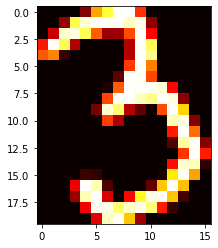

In [56]:
plt.imshow(X_train_new[30000], cmap="hot")

In [194]:
data = list(X_train_new.items())
X_train2 = np.array(data, dtype="object")

data = list(X_test_new.items())
X_test2 = np.array(data, dtype="object")

In [195]:
X_train2.shape

(3, 2)

In [150]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV


methods = [naive_bayes.GaussianNB]

for model2 in methods:
    print(str(model.__name__).upper(), "\n")
    nb = model2()

    pipe = Pipeline(steps=[
                        ('pca', PCA()),
                        ('estimator', nb),
                        ])

    parameters = {'estimator__var_smoothing': [1e-2, 1e-1, 1, 2]}
    Bayes = GridSearchCV(pipe, parameters, scoring='accuracy', cv=10).fit(X_train2, y_train)

    print(Bayes.best_estimator_)
    print('best score:')
    print(Bayes.best_score_)
    predictions = Bayes.best_estimator_.predict(X_test2)

    pred = Bayes.predict(X_test2)
    score = Bayes.score(X_test2, y_test)
    print("Test accuracy: ", score, "\n")
    print(confusion_matrix(pred, y_test))

    print("\n\n")

itted_transformer = fit_transform_one_cached(
  File "/Users/fredo/miniforge3/envs/DataScience/lib/python3.8/site-packages/joblib/memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "/Users/fredo/miniforge3/envs/DataScience/lib/python3.8/site-packages/sklearn/pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "/Users/fredo/miniforge3/envs/DataScience/lib/python3.8/site-packages/sklearn/decomposition/_pca.py", line 383, in fit_transform
    U, S, Vt = self._fit(X)
  File "/Users/fredo/miniforge3/envs/DataScience/lib/python3.8/site-packages/sklearn/decomposition/_pca.py", line 404, in _fit
    X = self._validate_data(X, dtype=[np.float64, np.float32],
  File "/Users/fredo/miniforge3/envs/DataScience/lib/python3.8/site-packages/sklearn/base.py", line 421, in _validate_data
    X = check_array(X, **check_params)
  File "/Users/fredo/miniforge3/envs/DataScience/lib/python3.8/site-packages/sklearn/utils/vali

ValueError: setting an array element with a sequence.

# SHAP

In [112]:
import shap
from sklearn.naive_bayes import GaussianNB, BernoulliNB

In [113]:
nb_model = BernoulliNB()

In [114]:
nb_model.fit(X_train, y_train)

BernoulliNB()

In [115]:
pred = nb_model.predict(X_test)

In [116]:
nb_model.score(X_test, y_test)

0.8413

In [117]:
e = shap.PermutationExplainer(nb_model, X_train)

In [121]:
e.shap_values(X_test[:5])

TypeError: 'BernoulliNB' object is not callable